In [1]:
import pyaudio

In [2]:
p = pyaudio.PyAudio()

In [3]:
def callback(in_data, frame_count, time_info, flag):
    if flag:
        print("Playback error: %i" % flag)

In [4]:
stream = p.open(format = pyaudio.paFloat32, channels = 1, rate=44100, stream_callback = callback, output=True, 
                frames_per_buffer = 1024 )

In [7]:
import pyaudio
import numpy as np

CHUNK = 4096 # number of data points to read at a time
RATE = 44100 # time resolution of the recording device (Hz)

p=pyaudio.PyAudio() # start the PyAudio class
stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
              frames_per_buffer=CHUNK) #uses default input device

# create a numpy array holding a single read of audio data
for i in range(10): #to it a few times just to see
    data = np.fromstring(stream.read(CHUNK),dtype=np.int16)
    dB = 20 * np.log10(data)
    print(data)
    
# close the stream gracefully
stream.stop_stream()
stream.close()
p.terminate()

C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in log10
C:\Users\Ryan\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in log10


[ 409  362  249 ..., 1824 1940 1904]
[1958 1985 1919 ...,  441  515  654]
[683 707 808 ..., 728 873 875]
[ 919  789  896 ..., -860 -856 -790]
[-898 -929 -965 ...,  244  241  318]
[325 339 324 ..., -27  37 -11]
[  -2  -21  -71 ..., -243 -203 -274]
[-203 -260 -224 ...,  197  121  202]
[ 166  254  234 ..., -384 -445 -403]
[-398 -410 -400 ..., 1341 1294 1405]


RMS version still need to somehow get comparison against background noise too

# TCP comms

In [1]:
import socket

In [3]:
TCP_IP = '10.101.241.28'
TCP_PORT = 5005
BUFFER_SIZE = 1024
MESSAGE = "Hello, World!"

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((TCP_IP, TCP_PORT))
s.send(MESSAGE)
data = s.recv(BUFFER_SIZE)
s.close()

# HEX converter

In [10]:
def pretty_hex(num):
    return hex(num)[2:-1]

# DB meter

In [5]:
import pyaudio
import numpy as np
import audioop
import pandas as pd

CHUNK = 4096 # number of data points to read at a time
RATE = 44100 # time resolution of the recording device (Hz)


In [11]:

p=pyaudio.PyAudio() # start the PyAudio class
stream=p.open(format=pyaudio.paInt16,channels=2,rate=RATE,input=True,
              frames_per_buffer=CHUNK, input_device_index = 1) #uses default input device

# generate RMS for the 10 samples

# for proper val compared to background noise need to get samples from mic2 and divide by it


DB = []

for i in range(10):
    
    data = []
    for i in range(10): #to it a few times just to see
        data = np.fromstring(stream.read(CHUNK),dtype=np.int16).astype(np.float)
    
        
        data[data <= 0.0000000001] = 0

    # the rms gives us the power from the amplitude
        
        db = 20 * np.log10(audioop.rms(data, 2))
        DB.append(db)
        print pretty_hex(db)
    
        # convert to amplitude
#         data = np.divide(data, float(32767))
        
        
        # issue we are taking the log 10 of numbers this small makes numpy throw error
        
#         mic1 = data.mean()
        
#         db.append( 20 * np.log10(mic1))
            

pd.DataFrame(data).plot(title = "Raw data")
pd.DataFrame(DB).plot(title = "Decibels 0 = quiet > 80 = factory level noise")
stream.stop_stream()
stream.close()
p.terminate()



4f
4f
4f
4e
4f
4f
4e
4f
4e
4f
4e
4f
4e
4f
4f
4e
4e
4f
4e
4e
4f
4e
4f
4e
4f
4e
4e
4e
4e
4f
4e
4e
4f
4e
4f
4f
4e
4e
4f
4e
4e
4f
4e
4f
4e
4f
4f
4e
4e
4f
4f
4e
4e
4e
4f
4e
4f
4e
4e
4e
4f
4f
4e
4f
4f
4e
4f
4f
4e
4e
4e
4f
4e
4f
4e
4e
4e
4f
4f
4e
4f
4f
4e
4f
4f
4f
4e
4f
4e
4e
4f
4e
4f
4e
4e
4f
4e
4f
4f
4f


In [16]:
import pyaudio

p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
#for each audio device, determine if is an input or an output and add it to the appropriate list and dictionary
for i in range (0,numdevices):
        if p.get_device_info_by_host_api_device_index(0,i).get('maxInputChannels')>0:
                print "Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0,i).get('name')

        if p.get_device_info_by_host_api_device_index(0,i).get('maxOutputChannels')>0:
                print "Output Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0,i).get('name')

devinfo = p.get_device_info_by_index(1)
print "Selected device is ",devinfo.get('name')
if p.is_format_supported(44100.0,  # Sample rate
                         input_device=devinfo["index"],
                         input_channels=devinfo['maxInputChannels'],
                         input_format=pyaudio.paInt16):
  print 'Yay!'
p.terminate()

Input Device id  0  -  Microsoft Sound Mapper - Input
Input Device id  1  -  Microphone (2- High Definition 
Output Device id  2  -  Microsoft Sound Mapper - Output
Output Device id  3  -  Speakers (2- High Definition Au
Selected device is  Microphone (2- High Definition 
Yay!


In [4]:
import pandas as pd

%matplotlib inline

In [57]:
pd.DataFrame(db)

,0
0,81.9542
1,81.8179
2,81.9229
3,81.9027
4,81.9715
5,81.902
6,81.934
7,81.9285
8,81.8572
9,81.9465


http://www.swharden.com/wp/2016-07-19-realtime-audio-visualization-in-python/

81.8241912947


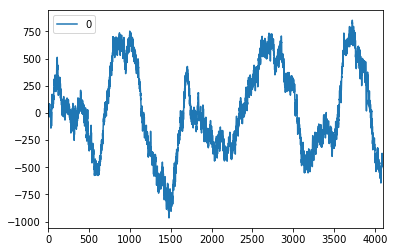

In [12]:
pd.DataFrame(data).plot()
print db
# pd.DataFrame(db).plot()

In [ ]:
import pyaudio
import numpy as np
import pylab
import time

RATE = 44100
CHUNK = int(RATE/20) # RATE / number of updates per second

def soundplot(stream):
    t1=time.time()
    data = np.fromstring(stream.read(CHUNK),dtype=np.int16)
    pylab.plot(data)
    pylab.title(i)
    pylab.grid()
    pylab.axis([0,len(data),-2**16/2,2**16/2])
    pylab.savefig("03.png",dpi=50)
    pylab.close('all')
    print("took %.02f ms"%((time.time()-t1)*1000))

if __name__=="__main__":
    p=pyaudio.PyAudio()
    stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
                  frames_per_buffer=CHUNK)
    for i in range(int(20*RATE/CHUNK)): #do this for 10 seconds
        soundplot(stream)
    stream.stop_stream()
    stream.close()
    p.terminate()

took 191.00 ms
took 150.00 ms
took 155.00 ms
took 142.00 ms
took 209.00 ms
took 142.00 ms
took 160.00 ms
took 165.00 ms
took 161.00 ms
took 145.00 ms
took 161.00 ms
took 143.00 ms
took 160.00 ms
took 149.00 ms
took 160.00 ms
took 227.00 ms
took 150.00 ms
took 159.00 ms
took 145.00 ms
took 167.00 ms
took 292.00 ms
took 145.00 ms
took 159.00 ms
took 144.00 ms
took 202.00 ms
took 217.00 ms
took 267.00 ms
took 149.00 ms
took 158.00 ms
took 144.00 ms
took 172.00 ms
took 149.00 ms
took 363.00 ms
took 143.00 ms
took 214.00 ms
took 150.00 ms
took 170.00 ms
took 144.00 ms
took 376.00 ms
took 141.00 ms
took 173.00 ms
took 265.00 ms
took 182.00 ms
took 309.00 ms
took 253.00 ms
took 318.00 ms
took 147.00 ms
took 160.00 ms
took 141.00 ms
took 170.00 ms
took 150.00 ms
took 167.00 ms
took 147.00 ms
took 321.00 ms
took 158.00 ms
took 173.00 ms
took 145.00 ms
took 161.00 ms
took 151.00 ms
took 159.00 ms
took 148.00 ms
took 175.00 ms
took 148.00 ms


C:\Users\Ryan\Anaconda2\lib\site-packages\matplotlib\axis.py:1045: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


took 176.00 ms
took 170.00 ms
took 162.00 ms
took 142.00 ms
took 163.00 ms
took 145.00 ms
took 159.00 ms
took 147.00 ms
took 356.00 ms
took 147.00 ms
took 177.00 ms
took 147.00 ms
took 244.00 ms
took 359.00 ms
took 149.00 ms
took 165.00 ms
took 142.00 ms
took 165.00 ms
took 143.00 ms
took 160.00 ms
took 138.00 ms
took 176.00 ms
took 227.00 ms
took 168.00 ms
took 165.00 ms
took 141.00 ms
took 166.00 ms
took 149.00 ms
took 157.00 ms
took 143.00 ms
took 406.00 ms
took 152.00 ms
took 164.00 ms
took 146.00 ms
took 161.00 ms
took 145.00 ms
took 160.00 ms
took 142.00 ms
took 174.00 ms
took 349.00 ms
took 172.00 ms
took 164.00 ms
took 143.00 ms
took 160.00 ms
took 141.00 ms
took 152.00 ms
took 152.00 ms
took 157.00 ms
took 153.00 ms
took 156.00 ms
took 151.00 ms
took 152.00 ms
took 141.00 ms
took 149.00 ms
took 142.00 ms
took 160.00 ms
took 149.00 ms
took 453.00 ms
took 146.00 ms
took 169.00 ms
took 177.00 ms
took 178.00 ms
took 143.00 ms
took 149.00 ms
took 145.00 ms
took 148.00 ms
took 142.0

In [18]:
%%HTML

<html>
<script language="javascript">
function RefreshImage(){
document.pic0.src="03.png?a=" + String(Math.random()*99999999);
setTimeout('RefreshImage()',50);
}
</script>
<body onload="RefreshImage()">
<img name="pic0" src="03.png">
</body>
</html>